# True vs Reco for interferometry

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import pyrex
import pyrex.custom.ara as ara
from pyrex.internal_functions import normalize
import os

import seaborn as sns

# mpl.use('agg') 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

# import mplcyberpunk
# plt.style.use("cyberpunk")

current_palette = sns.color_palette('colorblind', 10)

In [73]:
interf = pd.read_pickle("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/Reco_sim/reco_code/Interf_RecoVsTrue_simple.pkl")
interf = interf.loc[interf.maxAmplitude<1500]
# interf = interf.loc[interf.maxAmplitude>500]

# interf = interf.loc[interf.theta_true>100]

interf.tail()

,EvNum,theta_reco,theta_true,phi_reco,phi_true,R_posnu,weight,maxAmplitude
1126,1002024,117.0,116.448518,178.0,178.214368,1483.840415,9.953586e-01,851.932194
1127,1003347,101.0,100.314599,89.0,88.460804,1824.074641,9.991989e-01,414.780886
1128,1006689,106.0,105.633871,117.0,116.905861,1541.782804,9.991505e-01,374.471332
1129,1007144,105.0,97.586631,150.0,151.755934,1410.584189,1.594640e-11,309.370968
1130,1009710,102.0,102.114535,47.0,46.953464,2550.929703,9.987323e-01,329.643926


In [74]:
len(interf)

1021

(-15, 15)

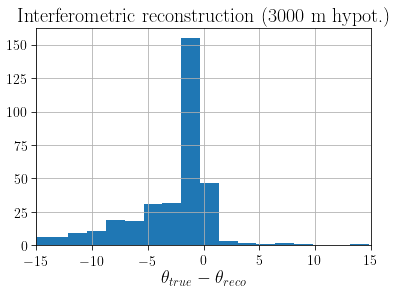

In [75]:
delta = np.array(interf.theta_true-interf.theta_reco)
plt.hist(delta, bins = 100, weights=interf.weight);
plt.grid()
plt.title("Interferometric reconstruction (3000 m hypot.)")
plt.xlabel(r"$\theta_{true}-\theta_{reco}$")
# plt.yscale("log")
plt.xlim(-15,15)
# plt.ylim(1E-1)

Text(0,0.5,'$\\theta_{reco}$')

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


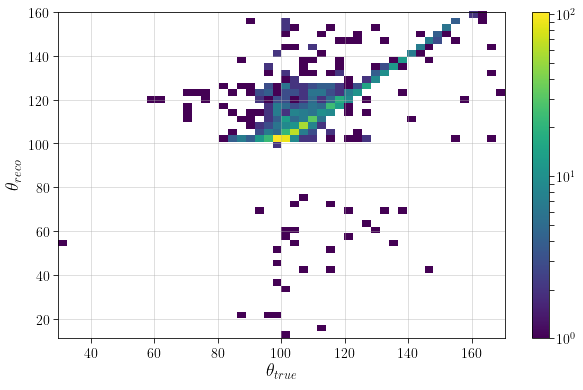

In [76]:
plt.figure(figsize=(10,6))
plt.hist2d(interf.theta_true, interf.theta_reco, bins = 50,cmin=1, norm=mpl.colors.LogNorm());
plt.colorbar()
plt.grid(alpha = 0.5)
plt.xlabel(r"$\theta_{true}$")
plt.ylabel(r"$\theta_{reco}$")


In [77]:
delta.mean()

-3.5766710082074513

(-10, 10)

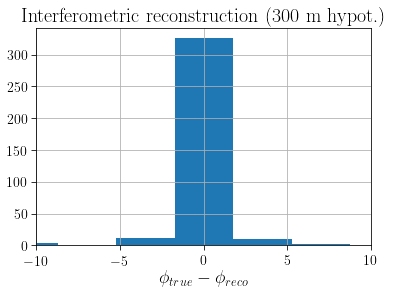

In [78]:
delta = np.array(interf.phi_true-interf.phi_reco)
plt.hist(delta, bins = 100, weights=interf.weight);
plt.grid()
plt.title("Interferometric reconstruction (300 m hypot.)")
plt.xlabel(r"$\phi_{true}-\phi_{reco}$")
# plt.yscale("log")
# plt.ylim(3E0)
plt.xlim(-10,10)

Text(0,0.5,'$\\theta_{reco}$')

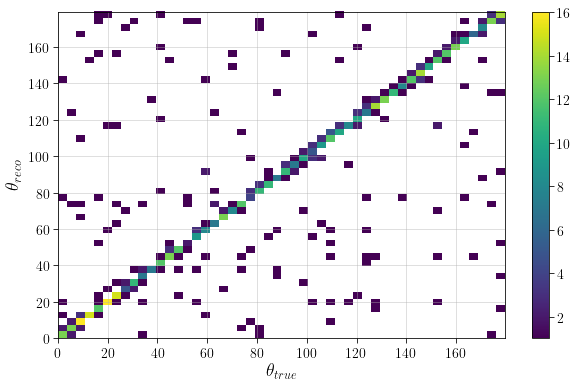

In [71]:
plt.figure(figsize=(10,6))
plt.hist2d(interf.phi_true, interf.phi_reco, bins = 50, cmin=1);
plt.colorbar()
plt.grid(alpha = 0.5)
plt.xlabel(r"$\theta_{true}$")
plt.ylabel(r"$\theta_{reco}$")


In [72]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [63]:
weighted_avg_and_std(delta, interf.weight)

(-2.7911513615820422, 4.276665135164609)

Text(0,0.5,'$\\theta_{reco}$')

/apps/python/3.6-conda5.2/lib/python3.6/site-packages/matplotlib/colors.py:1031: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


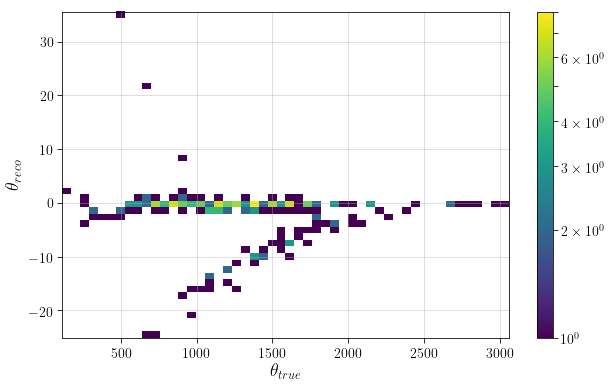

In [64]:
plt.figure(figsize=(10,6))
plt.hist2d(interf.R_posnu, np.array(interf.theta_true-interf.theta_reco), bins = 50,cmin=1, norm=mpl.colors.LogNorm());
plt.colorbar()
plt.grid(alpha = 0.5)
plt.xlabel(r"$\theta_{true}$")
plt.ylabel(r"$\theta_{reco}$")
